# Exercise 1 - Programming assignment

Exercise 1 includes four problems that you need to solve with programming. For each problem you need to modify the notebook by adding your own solutions. Remember to save and commit your changes locally, and push your changes to GitHub after each major change! Regular commits will help you to keep track of your changes (and revert them if needed). Pushing your work to GitHub will ensure that you don't lose any work in case your computer crashes (can happen!).
 
An overview of the tasks:

 - read data into geopandas from different file formats
 - make a simple static and interactive visualizations of the datasets 
 - conduct point pattern analysis by:
     - creating a Kernel Density Estimation for given point dataset
     - testing whether points are clustered based on Ripley's $G$, $F$ and $K$ function
 - give us an estimate about how much time you used for doing the exercise and optional feedback about it
 
### Due date

This exercise should be returned to your personal Github repository within **two weeks** after the first practical session (by Wednesday 23:59). Please notice that finishing the programming exercises can take significant amount of time (especially if you don't have yet much programming experience). Hence, **it is recommended that you start immediately working on them.**    
      
### Start your exercise in CSC Notebooks

Before you can start programming, you need to launch the CSC Notebook instance and clone your Exercise repository there using Git. If you need help with this, [read the documentation on the course site](https://spatial-analytics.readthedocs.io/en/latest/lessons/L1/git-basics.html).
 
### Hints 

If there are general questions arising from this exercise, we will add hints to the course website under [Exercise 1 description](https://spatial-analytics.readthedocs.io/en/latest/lessons/L1/exercise-1.html). 


## Problem 1 - Warm up (5 points)

In the first task you should write code in which you:
 
 - download and initialize OpenStreetMap data reader for Helsinki Region using `pyrosm`
 - Read following datasets from the OSM:
 
   1. Buildings
   2. Roads
   3. Administrative boundary for the city district where you live, e.g. "Otaniemi" (see [pyrosm docs](https://pyrosm.readthedocs.io/en/latest/basics.html#read-boundaries))
 
 - Select the buildings and roads that intersect with the given administrative boundary (district) 
 - Reproject the selected buildings and roads to EPSG:3067 (ETRS-TM35FIN)
 - Visualize the reprojected buildings, roads and the administrative boundary and produce a map that pleases your eye (style is free). 
   - Add a title to your map
   - If you want to use black background you can `import matplotlib.pyplot as plt` and specify `plt.style.use("dark_background")`
   - For example, the output could look like following:
 
![](img/hoods-example.png)
   

Please write your solution to the cell below (remove the `raise NotImplementedError()` code). You can create new cells as well if needed.

Text(0.5, 1.0, 'Perkkaa hoods')

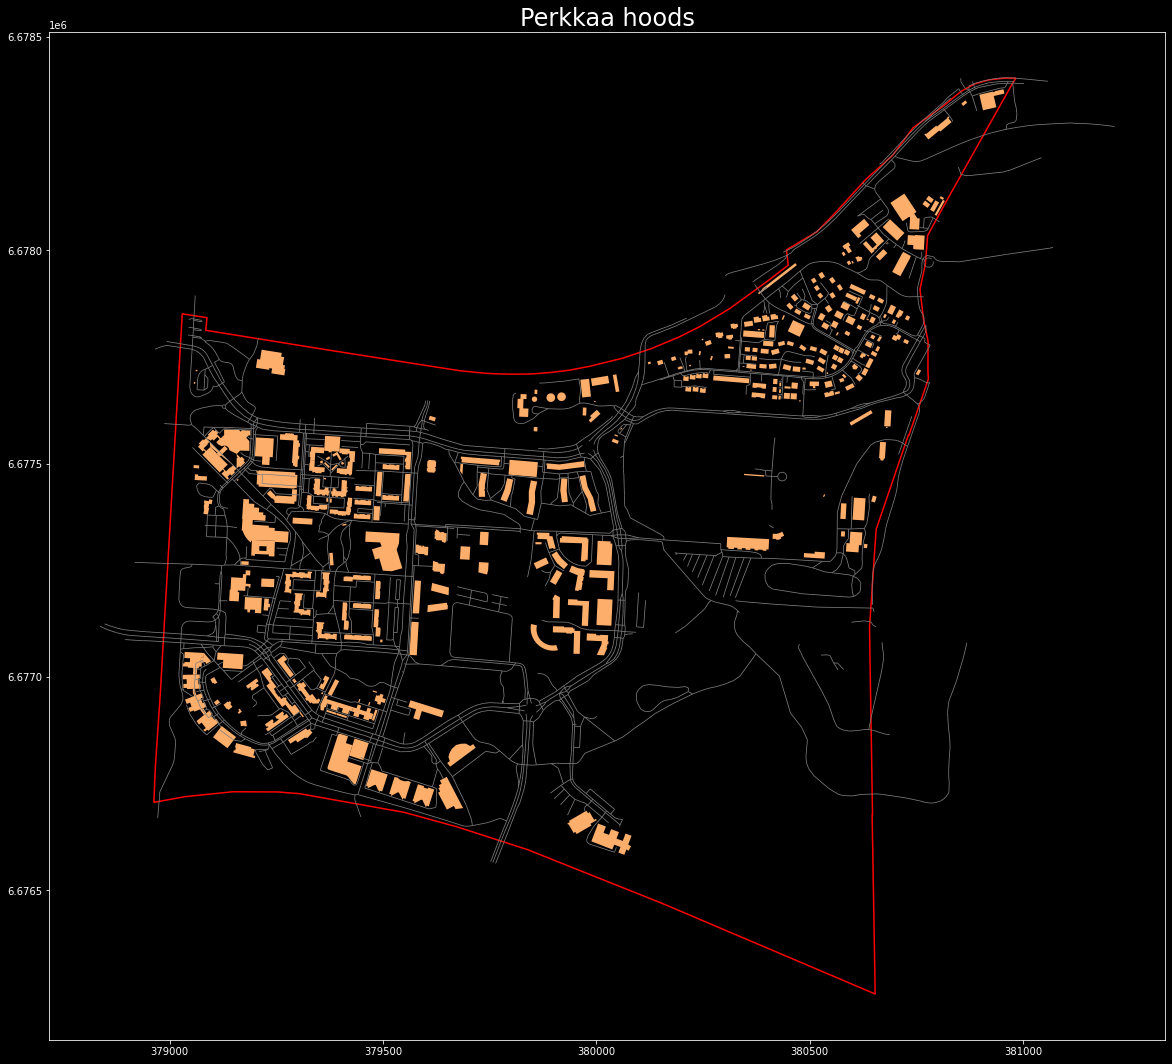

In [1]:
from pyrosm import OSM, get_data
import geopandas as gpd
import matplotlib.pyplot as plt
plt.style.use("dark_background")

#download and initialize OpenStreetMap data reader for Helsinki Region using pyrosm
fp = get_data("helsinki")
osm = OSM(fp)

#Read following datasets from the OSM:

#Buildings
osm_buildings = osm.get_buildings()

#Roads
osm_roads = osm.get_network()

#Administrative boundary for the city district where you live, e.g. "Otaniemi" (see pyrosm docs)
perkkaa_boundary = osm.get_boundaries(boundary_type='administrative', name='Perkkaa')

#Select the buildings and roads that intersect with the given administrative boundary (district)
perkkaa_buildings = gpd.sjoin(osm_buildings, perkkaa_boundary, how='inner', predicate='intersects')
perkkaa_roads = gpd.sjoin(osm_roads, perkkaa_boundary, how='inner', predicate='intersects')

#Reproject the selected buildings and roads to EPSG:3067 (ETRS-TM35FIN)
projected_buildings = perkkaa_buildings.to_crs(epsg=3067)
projected_roads = perkkaa_roads.to_crs(epsg=3067)
projected_boundary = perkkaa_boundary.to_crs(epsg=3067)

#Visualize the reprojected buildings, roads and the administrative boundary and produce a map.
ax = projected_buildings.plot(facecolor='#fdae6b', figsize=(20,20))
ax = projected_roads.plot(ax=ax, edgecolor="gray", linewidth=0.75)
ax = projected_boundary.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=1.5)

#Add a title to map
plt.title(label="Perkkaa hoods", fontsize=24, color="white")


## Problem 2  - Kernel Density Estimation (5 points)

Study the Helsinki building fires point dataset (`Helsinki_building_fires_2008-2010.csv`) and conduct a Kernel Density Estimation map. For doing this you will need Python's `pandas`, `geopandas`, `seaborn`, `matplotlib` and `contextily` libraries. You should do following tasks:

1. Read the data from `Helsinki_building_fires_2008-2010.csv` into pandas DataFrame (0.5 point)
2. Generate a new `geometry` column into the DataFrame based on the coordinates in the `x_coord` and `y_coord` columns. For doing this, you should use a handy function from geopandas called `gpd.points_from_xy()` (see [docs](https://geopandas.org/docs/reference/api/geopandas.points_from_xy.html)) (1 point)
3. Create a geopandas GeoDataFrame from the DataFrame and specify the Coordinate Reference System to be `"EPSG:2393"` using the `crs` parameter. (1 point)
4. Re-project the data into WGS84 (EPSG:4326) using `to_crs()` function (0.5 point)
5. Create a Kernel Density Estimation map(s) out of the points using `seaborn`'s `kde_plot()` function. Use `contextily` library to add a background map for the KDE. For reference/help, see [this section at Rey et al. 2021](https://geographicdata.science/book/notebooks/08_point_pattern_analysis.html#kernel-density-estimation-kde). The `kde_plot()` uses [scipy.stats_gaussian_kde()](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.stats.gaussian_kde.html#scipy.stats.gaussian_kde) function under the hood, which includes automatic bandwidth selection (read more from [scipy docs](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.stats.gaussian_kde.html#scipy.stats.gaussian_kde)). You can increase or decrease the amount of smoothing by using `bw_adjust` -parameter (the default value is 1). You can adjust the grid size (optional) using the parameter `gridsize` (the default value is 200). `gridsize` adjusts how many points/grids per dimension (x and y) are used to create the density surface. 
   - Try out how chaging the `bw_adjust` value influences the outcome (create at least two maps). Choose values between 0.25 and 2.0. (1 point)
   - Describe verbally how chaning the `bw_adjust` influences the KDE surface. (1 point)
   

As a result (with same parameters as in Rey et al. 2021, see link above), you should have something like following (does not need to look exactly like this):

![KDE Map](img/KDE_map.png)



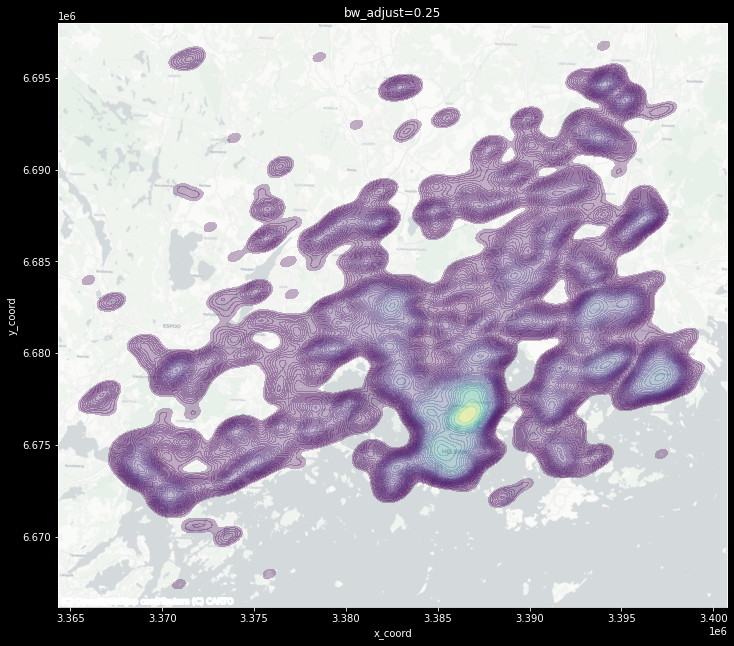

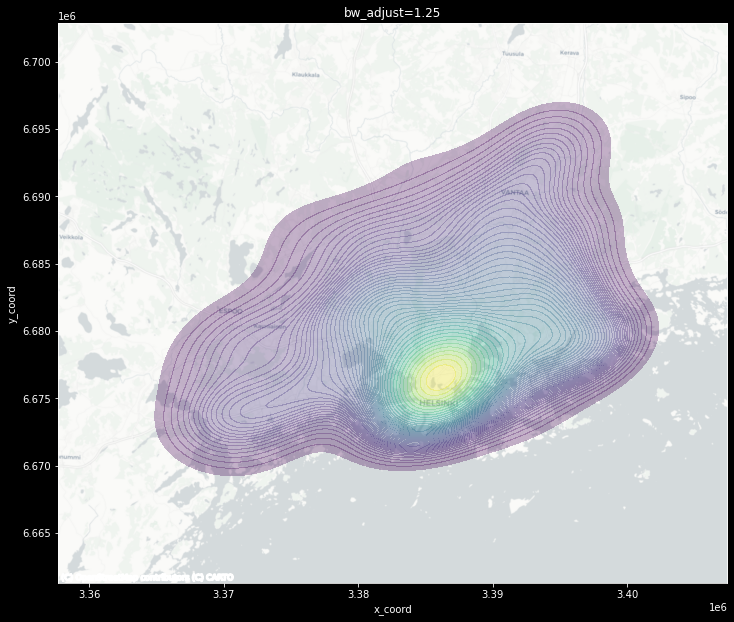

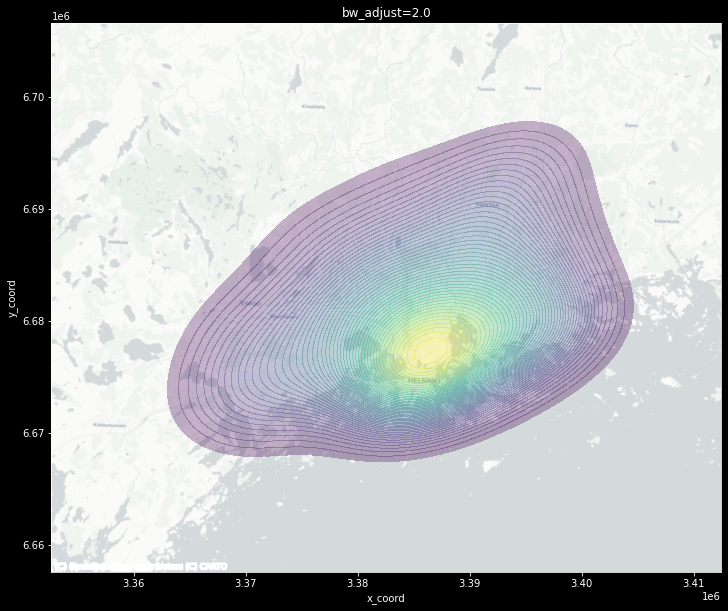

In [2]:
# YOUR CODE HERE
import pandas
import geopandas
import seaborn
import matplotlib
import contextily

#Filepath
fp = "data/Helsinki_building_fires_2008-2010.csv"

#Read the data from Helsinki_building_fires_2008-2010.csv into pandas DataFrame
firedf = pandas.read_csv(fp)

#This second DataFrame is for the pandas dataframe with coordinates (different from GeoDataFrame established later)
firedf_coords = pandas.read_csv(fp)

#Generate a new geometry column into the DataFrame based on the coordinates in the x_coord and y_coord columns.
geometry_col = geopandas.points_from_xy(x=firedf.x_coord, y=firedf.y_coord)
firedf_coords["geometry"] = geometry_col

#Create a geopandas GeoDataFrame from the DataFrame and specify the Coordinate Reference System to be "EPSG:2393" using the crs parameter.
firegdf = geopandas.GeoDataFrame(data=firedf, geometry=geometry_col, crs="EPSG:2393")

#Re-project the data into WGS84 (EPSG:4326) using to_crs() function (0.5 point)
projected_gdf = firegdf.to_crs(crs="EPSG:4326")

#Create a Kernel Density Estimation map(s) out of the points using seaborn's kde_plot() function. Use contextily library to add a background map for the KDE. 
#Try out how chaging the bw_adjust value influences the outcome (create at least two maps). Choose values between 0.25 and 2.0.
f, ax = matplotlib.pyplot.subplots(1, figsize=(12, 12))
matplotlib.pyplot.title("bw_adjust=0.25")
seaborn.kdeplot(data=projected_gdf, x='x_coord', y='y_coord', n_levels=50, shade=True, alpha=0.3, cmap='viridis', bw_adjust=0.25, gridsize=250)
contextily.add_basemap(ax, source=contextily.providers.CartoDB.Positron, crs="EPSG:2393")

f2, ax2 = matplotlib.pyplot.subplots(1, figsize=(12, 12))
matplotlib.pyplot.title("bw_adjust=1.25")
seaborn.kdeplot(data=projected_gdf, x='x_coord', y='y_coord', n_levels=50, shade=True, alpha=0.3, cmap='viridis', bw_adjust=1.25, gridsize=250)
contextily.add_basemap(ax2, source=contextily.providers.CartoDB.Positron, crs="EPSG:2393")

f3, ax3 = matplotlib.pyplot.subplots(1, figsize=(12, 12))
matplotlib.pyplot.title("bw_adjust=2.0")
seaborn.kdeplot(data=projected_gdf, x='x_coord', y='y_coord', n_levels=50, shade=True, alpha=0.3, cmap='viridis', bw_adjust=2.0, gridsize=250)
contextily.add_basemap(ax3, source=contextily.providers.CartoDB.Positron, crs="EPSG:2393")

#Describe verbally how chaning the bw_adjust influences the KDE surface.
#Description is found below the figures written in a markdown cell


### *Describe verbally how chaning the bw_adjust influences the KDE surface.*
Adjusting the value of bw_adjust seems to have an effect on the smoothness of the density surface curves. With small values of bw_adjust we get a lot of details and smaller features as the density surface. Larger values of bw_adjust seem to generalize the curves and depicts the big picture of the underlying phenomena. It seems that the value somehow relates to the distance how close or far the nearby points have an effect on the density surface values.


## Problem 3 - Ripley's alphabets: Are the point patterns clustered? (9 points)

Continue with the same Helsinki building fires dataset (you can use the same GeoDataFrame created in Problem 2). Next, you will study the point dataset for clustering by calculating Ripley's $G$, $F$ and $K$ functions. We provide you a function called `plot_Ripleys_test()` that you can use for producing the Ripley's $G$|$F$|$K$ curves against the Complete Spatial Random point process. You should do following tasks:

1. Extract `x` and `y` coordinates into a variable called `coordinates` from the GeoDataFrame into a numpy array. You can get the coordinate columns as arrays by placing their column names as a list inside the square brackets and calling `.values` which will return the columns as numpy arrays (`data[[<list-of-column-names-here>]].values`). The first five items in the result should look like following (1 point): 

   - ```
    array([[3106079.06347912, 6718552.22906183],
           [3160614.99720049, 6661209.04893058],
           [3245346.48042037, 6667679.82574259],
           [3281300.31644782, 6687652.0851804 ],
           [3328102.11312715, 6671726.3355373 ]])
    ```
2. Conduct Ripley's $G$ test based on the previous coordinates by using the `g_test()` function from `pointpats` library. As parameters, specify `support=40` which will create 40 "sample points" at different distances, and specify that we want to keep the simulation results (for CSR) by adding `keep_simulations=True`, and specify that the number of simulations is 1000 using `n_simulations` -parameter. Store the result of the test into a variable called `G` (1 point).

3. Visualize the result from Ripley's $G$ test by passing the variable `G` into the function `plot_Ripleys_test()` that we have provided for you below. Give your plot a descriptive title. The end result should look something like below (1 point):
![Ripley's G](img/ripleys_g.png)

4. **How would you interpret the result from $G$ test?** Describe the resulting graph and explain whether the point pattern seem to be clustered or not. Provide explanation why you end up in your conclusions. (1 point)

5. In a similar manner as in steps 2 and 3, conduct Ripley's $F$ test based on the coordinates by using the `f_test()` function from `pointpats` library. Use the same parameters as in step 2. Store the result of the test into a variable called `F` and visualize the result using `plot_Ripleys_test()`. (1 point). The result should look something like below:

![Ripley's F](img/ripleys_F.png)

6. **How would you interpret the result from $F$ test?** Describe the resulting graph and explain whether the point pattern seem to be clustered or not. Provide explanation why you end up in your conclusions. (1 point)

7. In a similar manner as in steps 2 and 3, conduct Ripley's $K$ test based on the coordinates by using the `k_test()` function from `pointpats` library. Use the same parameters as in step 2. Store the result of the test into a variable called `K` and visualize the result using `plot_Ripleys_test()`. (1 point). The result should look something like below:

![Ripley's K](img/ripleys_K.png)

8. **How would you interpret the result from $K$ test?** Describe the resulting graph and explain whether the point pattern seem to be clustered or not. Provide explanation why you end up in your conclusions. (1 point)

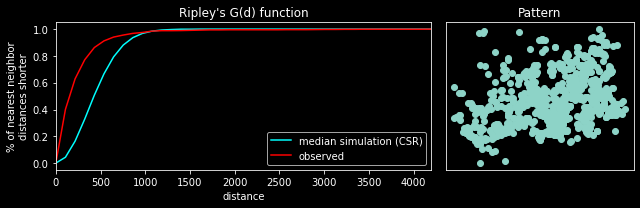

The plotted G(d) fuction can be interpreted by analyzing its rate of growth with small values of distance and by comparison on the complete randomness. The observed Ripley's G(d) function grows faster with small distances compared to the complete spatial randomness (CRS). This indicates that the patterns has more points near one another than complete randomness and therefore seems to have at least some clustering. 



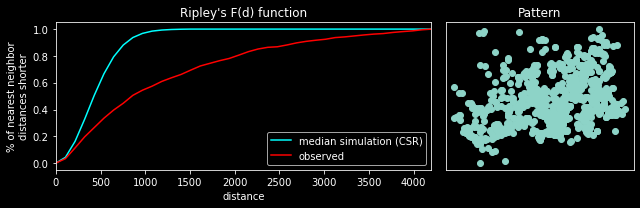

The Ripley's F(d) function plot can be analyzed by comparing the rate of growth to the complete spatial randomness. The function seems to grow cumulatively slower than the CSR which means that the observations are more likely to have large gaps or empty areas, thus being at least somewhat clustered. Ripley's F represents the distances from randomly selected point in space to some point pattern. Therefore longer distances are expected as the point pattern is more clustered.



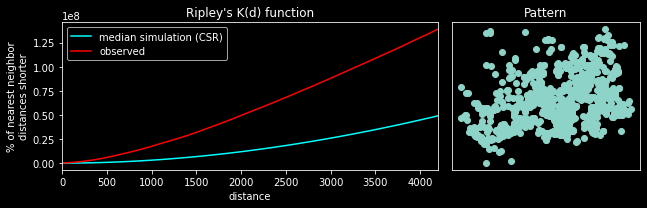

In the K(d) plot, the function is growing faster than the CRS simulation. This means that there is more points falling inside the imaginary circle with radius of distance d in the observationsthan in the CSR. Because the K(d) function has always bigger values than CSR, we have clustering at smaller and larger distances.



In [3]:
def plot_Ripleys_test(test, 
                      coordinates,
                      title="", 
                      xlabel="distance", 
                      ylabel='% of nearest neighbor\ndistances shorter',
                      xlim=None,
                      ):
    """
    Helper function to plot results from Ripley's tests. 
    Modified after Rey, Arribas-Bel & Wolf (2021). Geographic Data Science with Python.
    """
    
    import matplotlib.pyplot as plt
    import numpy as np

    f,ax = plt.subplots(1,2,figsize=(9,3), 
                        gridspec_kw=dict(width_ratios=(6,3)))
    
    # Plot the simulations with thin lines
    ax[0].plot(test.support, test.simulations.T, color='k', alpha=.01)
    
    # Show the average of simulations
    ax[0].plot(test.support, np.median(test.simulations, axis=0), color='cyan', 
             label='median simulation (CSR)')


    # Show the observed pattern's G|F|K function
    ax[0].plot(test.support, test.statistic, label = 'observed', color='red')

    # Clean labels and axes
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)
    ax[0].legend()
    
    # If xlim is provided modify accordingly
    if xlim is not None:
        ax[0].set_xlim(0, xlim)
    else:
        ax[0].set_xlim(0, round(test.support.max(), 0))
        
    # Set title for the plot
    ax[0].set_title(title)

    # Plot the point pattern 
    ax[1].scatter(*coordinates.T)

    # Clean up labels and axes from the point pattern
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    ax[1].set_xticklabels([])
    ax[1].set_yticklabels([])
    ax[1].set_title('Pattern')
    f.tight_layout()
    plt.show()


# YOUR CODE HERE
from pointpats import distance_statistics

# Change datatypes of the coordinates to floats
projected_gdf['x_coord'] = projected_gdf['x_coord'].astype(float)
projected_gdf['y_coord'] = projected_gdf['y_coord'].astype(float)

#Extract x and y coordinates into a variable called coordinates from the GeoDataFrame into a numpy array.
coordinates = projected_gdf[['x_coord', 'y_coord']].values

#Conduct Ripley's  𝐺  test based on the previous coordinates by using the g_test() function from pointpats library.
G = distance_statistics.g_test(coordinates, support=40, keep_simulations=True, n_simulations=1000)

#Visualize the result from Ripley's  𝐺  test 
plot_Ripleys_test(G, coordinates, title="Ripley's G(d) function")

#How would you interpret the result from  𝐺  test? Describe the resulting graph and explain whether the point pattern seem to be clustered or not. 
#Provide explanation why you end up in your conclusions.
print("""The plotted G(d) fuction can be interpreted by analyzing its rate of growth with small values of distance and by comparison on the complete randomness. \
The observed Ripley's G(d) function grows faster with small distances compared to the complete spatial randomness (CRS). \
This indicates that the patterns has more points near one another than complete randomness and therefore seems to have at least some clustering. \n""")

# conduct Ripley's  𝐹  test based on the coordinates by using the f_test() function from pointpats library. 
F = distance_statistics.f_test(coordinates, support=40, keep_simulations=True, n_simulations=1000)
plot_Ripleys_test(F, coordinates, title="Ripley's F(d) function")

# How would you interpret the result from  𝐹  test? Describe the resulting graph and explain whether the point pattern seem to be clustered or not. 
# Provide explanation why you end up in your conclusions.
print("""The Ripley's F(d) function plot can be analyzed by comparing the rate of growth to the complete spatial randomness. \
The function seems to grow cumulatively slower than the CSR which means that the observations are more likely to have large gaps or empty areas, thus being at least somewhat clustered. \
Ripley's F represents the distances from randomly selected point in space to some point pattern. Therefore longer distances are expected as the point pattern is more clustered.\n""")

# conduct Ripley's  𝐾  test based on the coordinates by using the k_test() function from pointpats library. 
K = distance_statistics.k_test(coordinates, support=40, keep_simulations=True, n_simulations=1000)
plot_Ripleys_test(K, coordinates, title="Ripley's K(d) function")

# How would you interpret the result from  𝐾  test? Describe the resulting graph and explain whether the point pattern seem to be clustered or not. 
# Provide explanation why you end up in your conclusions.

print("""In the K(d) plot, the function is growing faster than the CRS simulation. This means that there is more points falling inside the imaginary circle with radius of distance d in the observations\
than in the CSR. Because the K(d) function has always bigger values than CSR, we have clustering at smaller and larger distances.\n""")


## Problem 4 - How long did it take? Optional feedback (1 point)

To help developing the exercises, and understanding the time that it took for you to finish the Exercise, please provide an estimate of how many hours you spent for doing this exercise?

 - I spent approximately this many hours: **X hours**
 
In addition, if you would like to give any feedback about the exercise (optional), please provide it below:

 - My feedback: 

## Problem 4 - How long did it take? Optional feedback (1 point)

To help developing the exercises, and understanding the time that it took for you to finish the Exercise, please provide an estimate of how many hours you spent for doing this exercise?

 - I spent approximately this many hours: **14 hours**

 - My feedback: 
 
 I found the exercises overall very motivating and I feel that they helped my learnign a lot. The format of this type of jupyter notebook works in my opinion very well and I like that I learn also about coding and other useful skills in addition. The format in which the verbal explanations should be represented was somewhat unclear. Is it better to do them as comments or print command inside the code cells or as separate markdowns?